In [31]:
import sys
import os

# Add the 'back-end' directory to sys.path
sys.path.append(os.path.abspath(".."))

In [33]:
from models_src.tabular.decisionTreeModel import decisionTreeModel
from models_src.tabular.logisticRegressionModel import logisticRegressionModel 
from models_src.tabular.randomForestModel import randomForestModel
from utils.aiUtils import X_test, y_test


In [34]:
dtm = decisionTreeModel
rfm = randomForestModel
lr = logisticRegressionModel

In [35]:
y_pred_dtm = dtm.predict(X_test)
y_pred_rfm = rfm.predict(X_test)
y_pred_lr = lr.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

print('Accuracy Decision Tree Model: ', accuracy_score(y_true=y_test, y_pred=y_pred_dtm)*100)
print('Accuracy Random Forest Model: ', accuracy_score(y_true=y_test, y_pred=y_pred_rfm)*100)
print('Accuracy Logistic Regression Model: ', accuracy_score(y_true=y_test, y_pred=y_pred_lr)*100)

Accuracy Decision Tree Model:  91.6083916083916
Accuracy Random Forest Model:  95.8041958041958
Accuracy Logistic Regression Model:  97.2027972027972


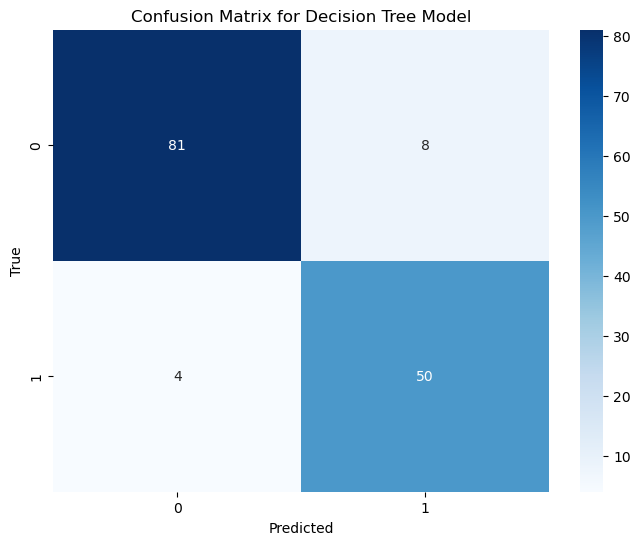

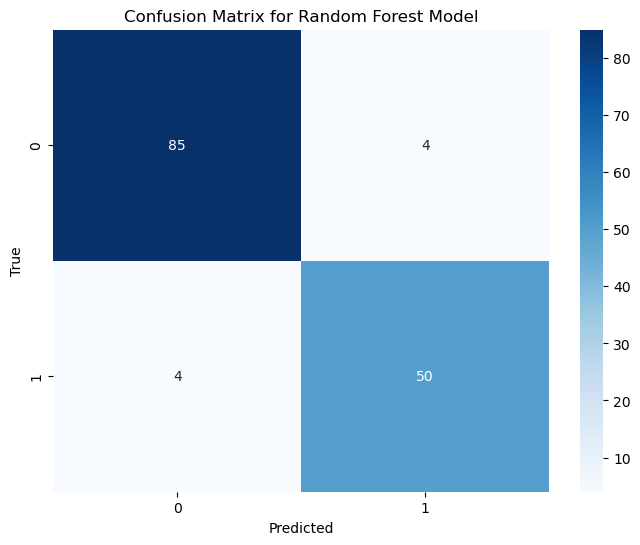

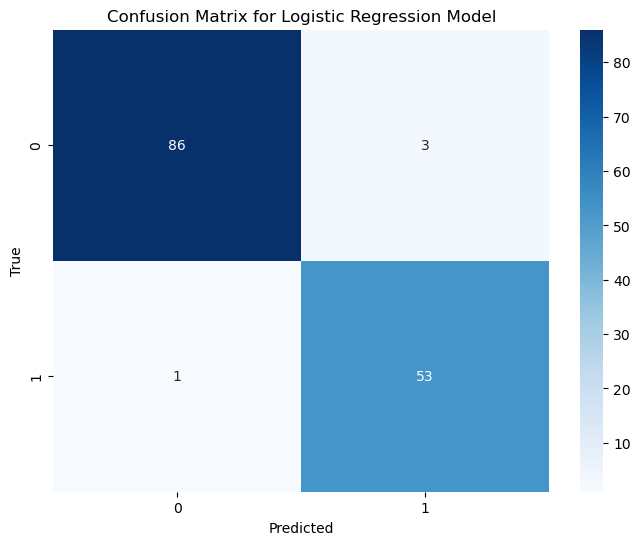

In [28]:
# Generate the Confusion Matrices
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
plot_confusion_matrix(y_test, y_pred_dtm, "Decision Tree Model")
plot_confusion_matrix(y_test, y_pred_rfm, "Random Forest Model")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Model")